In [22]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Optimization


$$ f(x) = (x-3)^2 $$



In [4]:
from scipy.optimize import minimize

In [9]:
def f(x):
    return (x-3)**2

res = minimize(f,2) # starting value that we think is the minnimum can be any value

In [6]:
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551437397369767e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.325e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

In [8]:
res.x ##  x = 3 for which f(x) is minnimum

array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$


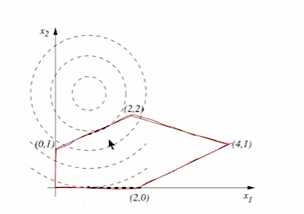


* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [14]:
# we are going to basically have an array x which contains x and y values ,can be accessed using x[0] and x[1]
f = lambda x:(x[0]-1)**2 + (x[1] - 2.5)**2
## constraints are given as tuples and the x>=0 and y >=0 as bounds
cons= ({'type':'ineq','fun':lambda x:x[0]-2*x[1] + 2 },
      {'type':'ineq','fun':lambda x:-x[0]-2*x[1] + 6 },
      {'type':'ineq','fun':lambda x:-x[0]-2*x[1] + 2 })
bounds = ((0,None),(0,None))
res = minimize(f,(2,0),bounds=bounds,constraints=cons)

In [20]:
res.x  # x = 0.2 and y = 0.9

array([0.2, 0.9])

## Interpolation

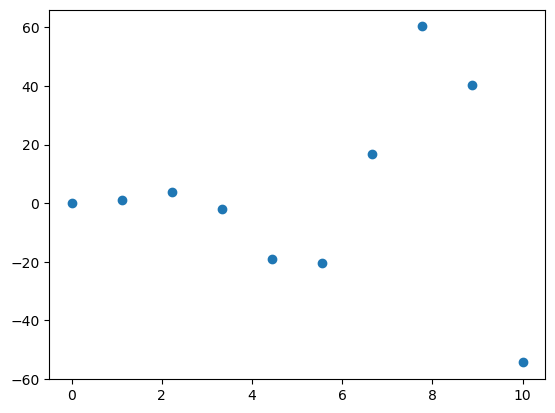

In [24]:
x = np.linspace(0,10,10)
y = x**2 * np.sin(x)
plt.scatter(x,y)

In [25]:
from scipy.interpolate import interp1d

In [37]:
f = interp1d(x,y,kind = "linear")
x_dense = np.linspace(0,10,100) # creating a dense space for smoothening of the curve
y_dense = f(x_dense)

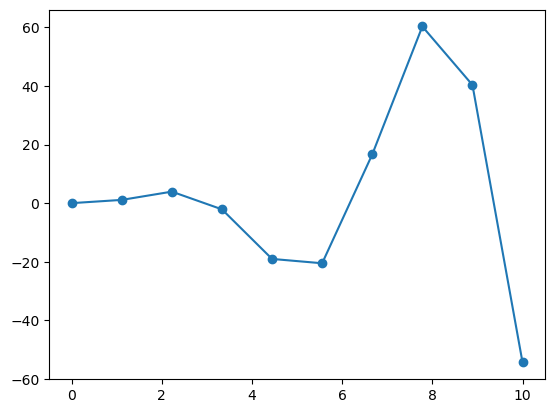

In [38]:
plt.plot(x_dense,y_dense)
plt.scatter(x,y)

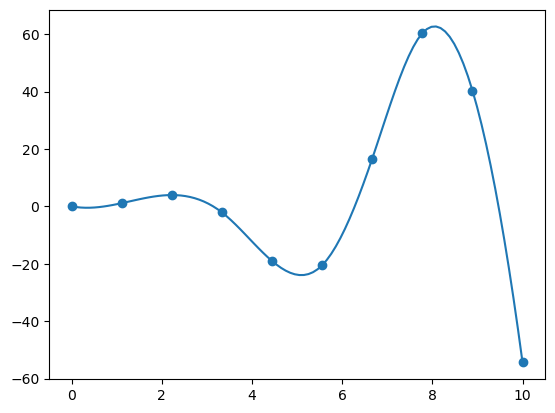

In [49]:
f = interp1d(x,y,kind = "cubic") #cubic more smoother
x_dense = np.linspace(0,10,100) # creating a dense space for smoothening of the curve
y_dense = f(x_dense)
plt.plot(x_dense,y_dense)
plt.scatter(x,y)

## Curve Fitting

In [40]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

Want to fit the data to the curve $y = ax^2 + b$. The main goal here is determine the values of $a$ and $b$

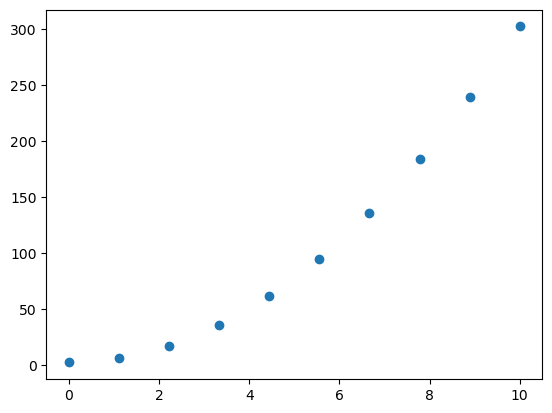

In [42]:
plt.scatter(x_data,y_data)

In [43]:
from scipy.optimize import curve_fit

In [48]:
def func(x,a,b):
    return a*x**2 + b
# initial guess remember in these libraries we always have to provide some intial value for them to work on
popt, pcov = curve_fit(func,x_data,y_data,p0=(1,1))  # popt = population_optimization and pcov = population_covariance
popt

array([3., 2.])